**CURSO**: Análisis Geoespacial, Departamento de Geociencias y Medio Ambiente, Universidad Nacional de Colombia - sede Medellín <br/>
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from Towards Data Science - [Amanda Iglesias Moreno](https://towardsdatascience.com/analysis-of-car-accidents-in-barcelona-using-pandas-matplotlib-and-folium-73384240106b).

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data
Open Data Barcelona is Barcelona´s data service which contains around 400 datasets, covering a wide rage of topics such as population, business, or housing. We employ the dataset that contains the accidents managed by the local police in the city of Barcelona in 2017. This dataset includes information such as the number of injuries by severity, the number of vehicles involved, the date, and the geographic location of the accident

## Exploratory data analysis and data cleaning
Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics. The objective is to understand the data, discover patterns and anomalies, and check assumption before we perform further evaluations.

In [1]:
df = pd.read_csv('../Data/accidents_2017.csv')
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


As we can observe, the dataframe contains 15 columns: Id, District Name, Neighborhood, Street, Weekday, Month, Day, Hour, Part of the day, Mild injuries, Serious injuries, Victims, Vehicles involved, Longitude, Latitude.

In [3]:
# List of columns names
list(df.columns)

['Id',
 'District Name',
 'Neighborhood Name',
 'Street',
 'Weekday',
 'Month',
 'Day',
 'Hour',
 'Part of the day',
 'Mild injuries',
 'Serious injuries',
 'Victims',
 'Vehicles involved',
 'Longitude',
 'Latitude']

In [2]:
# Dataframe info : column name and types, null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10339 non-null  object 
 2   Neighborhood Name  10339 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


Apparently, there are not null values, since all the columns have 10339 entries. However, some entries contain the string Unknown. We can replace this string by not a number and assess again the number of null values by using the pandas.DataFrame.info method

In [5]:
# Apparently, there are not null values.
df.isnull().sum().any()
# False
# meaning there are not null values.

# replace Unknown with n.a
df.replace('Unknown',np.nan, inplace=True)

# Now, There are null values
df.isnull().sum().any()
# True

# Access number of null values using the .info() method.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10312 non-null  object 
 2   Neighborhood Name  10312 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


As we can see, only the columns District Name and Neighborhood Name contain null values. Since we are not going to use these columns in our further analysis, we do not need to take into consideration the null values. We won’t analyze where the accident happened by using the District Name and Neighbourhood Name, but by using the Longitude and Latitud.
Before we start to draw conclusions using our data, we are going to clean it. The first cleaning step consists of dropping unnecessary columns to simplify the dataframe.

In [6]:
# Drop unnecessary columns.
df.drop(['District Name','Neighborhood Name','Part of the day'],axis=1 ,inplace=True)

# Columns after dropping.
df.columns

Index(['Id', 'Street', 'Weekday', 'Month', 'Day', 'Hour', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

After dropping the columns, we modify some data types. We can consult the data types by using pandas.DataFrame.info method or pandas.DataFrame.dtypes attribute. The latter returns a Series with the data type of each column.

As we can observe, Month, Day, and Hour are not datetime objects. We can easily combine those columns into a single column using the pandas.to_datetime function. Before using this function, we modify column names, replacing spaces by underscores and upper case letters by lower case letters. Additionally, we include a column with the year.

In [8]:
# Change columns names. Replace spaces by underscores and upper case letters by lower case letters.
df.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)

# New column names
df.columns
# Index(['id', 'street', 'weekday', 'month', 'day', 'hour', 'mild_injuries','serious_injuries', 'victims', 'vehicles_involved', 'longitude','latitude'],dtype='object')

Index(['id', 'street', 'weekday', 'month', 'day', 'hour', 'mild_injuries',
       'serious_injuries', 'victims', 'vehicles_involved', 'longitude',
       'latitude', 'year'],
      dtype='object')

In [7]:
# Add a column with the year in this case 2017
df['year'] = np.repeat(2017,df.shape[0])

# first rows after adding the year
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year
0,2017S008429,Número 27 ...,Friday,October,13,8,2,0,2,2,2.125624,41.340045,2017
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,2,0,2,2,2.120452,41.339426,2017
2,2017S010210,Litoral (Besòs) ...,Friday,December,8,21,5,0,5,2,2.167356,41.360886,2017
3,2017S006364,Número 3 Zona Franca ...,Friday,July,21,2,1,0,1,2,2.124529,41.337668,2017
4,2017S004615,Las Navas de Tolosa ...,Thursday,May,25,14,1,0,1,3,2.185272,41.416365,2017


Now, we can combine weekday, month, day, hour, and year into one single column called date. To avoid a ValueError, we have to convert month names into integers before using the pandas.to_datetime function.

In [10]:
# Obtain month names 
list(df.month.unique())

[10, 9, 12, 7, 5, 6, 1, 4, 3, 11, 2, 8]

In [9]:
# Month names to int
month_to_int = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
# Convert month names into numbers
df['month'].replace(month_to_int,inplace=True)

# Obtain new month names
list(df.month.unique())
# [10, 9, 12, 7, 5, 6, 1, 4, 3, 11, 2, 8]

[10, 9, 12, 7, 5, 6, 1, 4, 3, 11, 2, 8]

After the conversion, we can obtain a datetime column using the aforementioned function as follows:

In [11]:
# Combine columns month day hour and year to create a single datetime column.
df['date']=pd.to_datetime(df[['year', 'month', 'day','hour']])

# Observe the first 5 columns.
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year,date
0,2017S008429,Número 27 ...,Friday,10,13,8,2,0,2,2,2.125624,41.340045,2017,2017-10-13 08:00:00
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,2,0,2,2,2.120452,41.339426,2017,2017-09-01 13:00:00
2,2017S010210,Litoral (Besòs) ...,Friday,12,8,21,5,0,5,2,2.167356,41.360886,2017,2017-12-08 21:00:00
3,2017S006364,Número 3 Zona Franca ...,Friday,7,21,2,1,0,1,2,2.124529,41.337668,2017,2017-07-21 02:00:00
4,2017S004615,Las Navas de Tolosa ...,Thursday,5,25,14,1,0,1,3,2.185272,41.416365,2017,2017-05-25 14:00:00


We can easily check the data type of the date column by using the pandas.DataFrame.dtypes attribute.

In [12]:
# Check the datatype of the date column
df.date.dtypes

dtype('<M8[ns]')

To access individual elements of the date such as month, day, or hour, we can use the pandas.Series.dt attribute. We can even access the day of the week by using the pandas.Series.dt.dayofweek attribute, where Monday=0 and Sunday=6.

In [13]:
# Extract the year
df['date'].dt.year

# Extract the month
df['date'].dt.month

# Extract the day
df['date'].dt.day

# Extract the hour
df['date'].dt.hour

# Extract the day of the week
df['date'].dt.dayofweek

# Day of the week - first five elements of the returned serie.
df['date'].dt.dayofweek.head()

0    4
1    4
2    4
3    4
4    3
Name: date, dtype: int64

Since we can access all the information we need related to the date of the accident using pandas.Series.dt attribute, we can drop columns month, year, hour, day, and day of the week, as they are not longer needed.

In [14]:

# Drop columns hour, day, month, year, weekday
df.drop(['hour','day','month','year','weekday'], axis=1, inplace=True)

# Dataframe columns
list(df.columns)

['id',
 'street',
 'mild_injuries',
 'serious_injuries',
 'victims',
 'vehicles_involved',
 'longitude',
 'latitude',
 'date']

Finally, we can drop the street column as well, since we are going to visualize where the accidents happened using only the longitude and latitude.

In [15]:
# Drop the street column
df.drop(['street'], axis=1, inplace=True)

# First 5 rows of the dataframe
df.head()

,id,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
0,2017S008429,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,5,0,5,2,2.167356,41.360886,2017-12-08 21:00:00
3,2017S006364,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


As shown above, the dataframe obtained contains 8 columns: id, mild_injuries, serious_injuries, victims, vehicles_involved, longitud, latitude, and date.
To easily access information about a car accident, we are going to set id as the index of the data frame, removing before the trailing spaces present in the id entries.

In [16]:
# We have noticed that id has spaces at the end of the string
df.id.loc[0]
# '2017S008429    '

# We remove the spaces in the entries of id 
df.id = df.id.apply(lambda x: x.strip())

# We have removed the spaces successfully
df.id.loc[0]
# '2017S008429'

# We can set id as the index of the dataframe
df.set_index('id', inplace=True)

# Now we can easily access information about an accident using its id.
df.loc['2017S008429']

mild_injuries                          2
serious_injuries                       0
victims                                2
vehicles_involved                      2
longitude                       2.125624
latitude                       41.340045
date                 2017-10-13 08:00:00
Name: 2017S008429, dtype: object

The final cleaning step consists of evaluating whether there are duplicated entries in the data frame. If so, we will remove these duplicated entries from the data frame, as they represent the same car accident.

In [17]:
# Assess whether or not the dataframe contains duplicated rows.
df.duplicated().sum()
# 9

# Print duplicated rows.
df[df.duplicated()]

,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
id,,,,,,,
2017S006811,1,0,1,2,2.147915,41.393601,2017-08-07 10:00:00
2017S003575,1,0,1,2,2.194670,41.412827,2017-04-21 10:00:00
2017S003286,1,0,1,1,2.136744,41.357598,2017-04-10 13:00:00
2017S008856,1,0,1,1,2.203962,41.407568,2017-10-26 08:00:00
2017S003750,1,0,1,1,2.168836,41.386306,2017-04-27 16:00:00
2017S001504,1,0,1,2,2.139400,41.418656,2017-02-23 14:00:00
2017S004447,1,0,1,1,2.209813,41.402218,2017-05-19 20:00:00
2017S005606,1,0,1,3,2.189016,41.383396,2017-06-27 17:00:00
2017S003201,1,0,1,1,2.168349,41.430413,2017-04-06 19:00:00


In [18]:
# Shape of the dataframe before removing duplicated columns
df.shape
# (10339, 7)

# Drop duplicates.
df.drop_duplicates(inplace=True)

# Shape after dropping duplicates.
df.shape
#(10330, 7)

(10330, 7)

Data cleaning finished!! Now! We are ready to answer questions and draw conclusions using our data

## Time analysis

We can easily obtain the total number of accidents registered in Barcelona by using the pandas.DataFrame.shape attribute, since each entry of the data frame represent a different car accident.

In [19]:
print('Total number of accidents in 2017 :{}'.format(df.shape[0]))

Total number of accidents in 2017 :10330


To analyze the distribution of car accidents per month, we employ the pandas.DataFrame.groupby function. A groupby operation involves a combination of splitting the object, applying a function, and combining the results. First, we group by month, and then we calculate the number of accidents in each month. We can easily interpret the result by using a bar plot as follows:

In [20]:
import calendar
# Number of accident per month
accidents_month = df.groupby(df['date'].dt.month).count().date

# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month

January      844
February     823
March        935
April        841
May          962
June         907
July         918
August       651
September    769
October      927
November     991
December     762
Name: date, dtype: int64

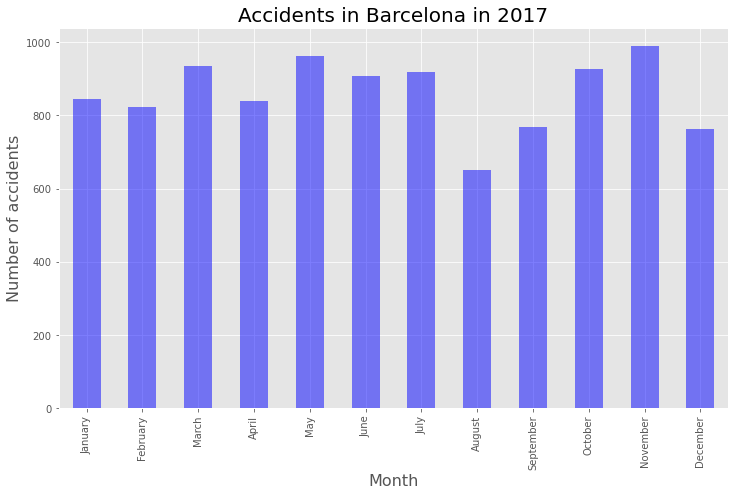

In [22]:
plt.style.use('ggplot')

# plot accidents per month
accidents_month.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

As we can observe, the number of accidents decreases in August and December. One reason could be that fewer people are driving to work in these months.

As we did with months, we can analyze the distribution of car accidents according to the day of the week by using a bar plot as well.

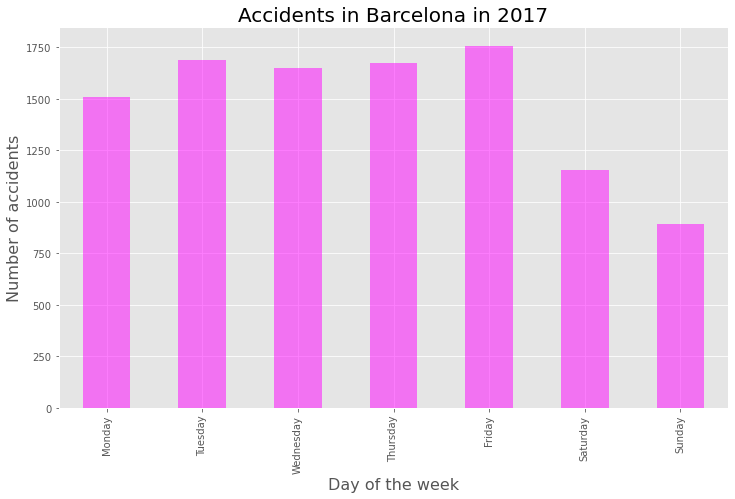

In [23]:
# Number of accident per day of the week
accidents_day = df.groupby(df['date'].dt.dayofweek).count().date

# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
accidents_day.plot(kind='bar',figsize=(12,7), color='magenta', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

As shown in the plot above, the number of car accidents decrease at the weekend. Weekdays present an average of 1656 car accidents per day, around 600 more accidents than on weekends (on average 1025 car accidents per day).

The next plot depicts the number of accidents during each day of the year. As we can observe, there are between 10–50 accidents per day and the number of accidents on friday are as a rule much higher than the number of accidents on sunday.

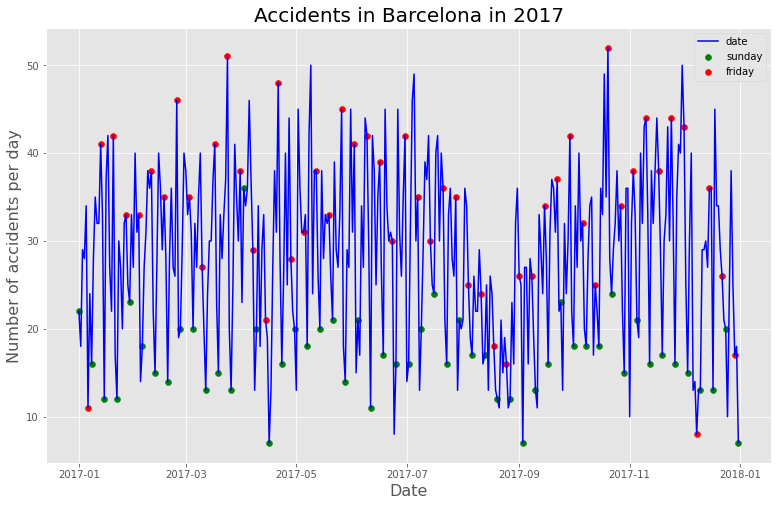

In [24]:
accidents = df.groupby(df['date'].dt.date).count().date

accidents.plot(figsize=(13,8), color='blue')

# sunday accidents
sundays = df.groupby(df[df['date'].dt.dayofweek==6].date.dt.date).count().date
plt.scatter(sundays.index, sundays, color='green', label='sunday')

# friday accidents
friday = df.groupby(df[df['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(friday.index, friday, color='red', label='friday')

# Title, x label and y label
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=16);
plt.legend()

Following the same procedure as before, we plot the distribution of car accidents this time according to time.

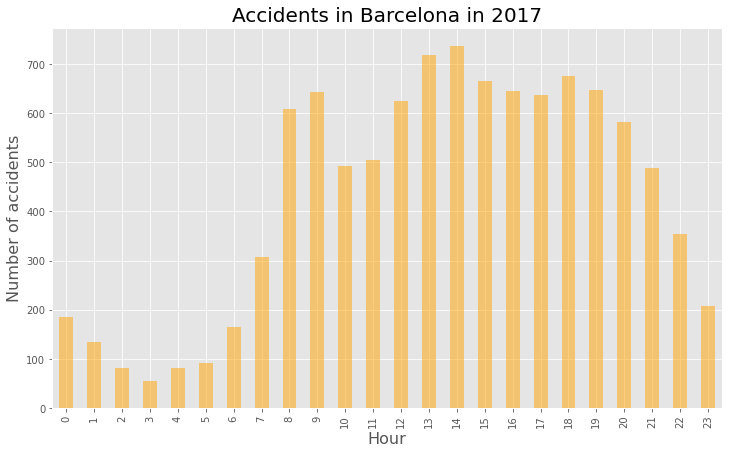

In [25]:
# Number of accident per hour
accidents_hour = df.groupby(df['date'].dt.hour).count().date

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

As we can observe in the plot, the greater number of accidents occur in early-morning hours 8–9 and between 12 and 20.

We can also analyze the number of accidents per day of the week and hour using a side-by-side bar plot. In this particular case, we use a horizontal plot for better visualization.

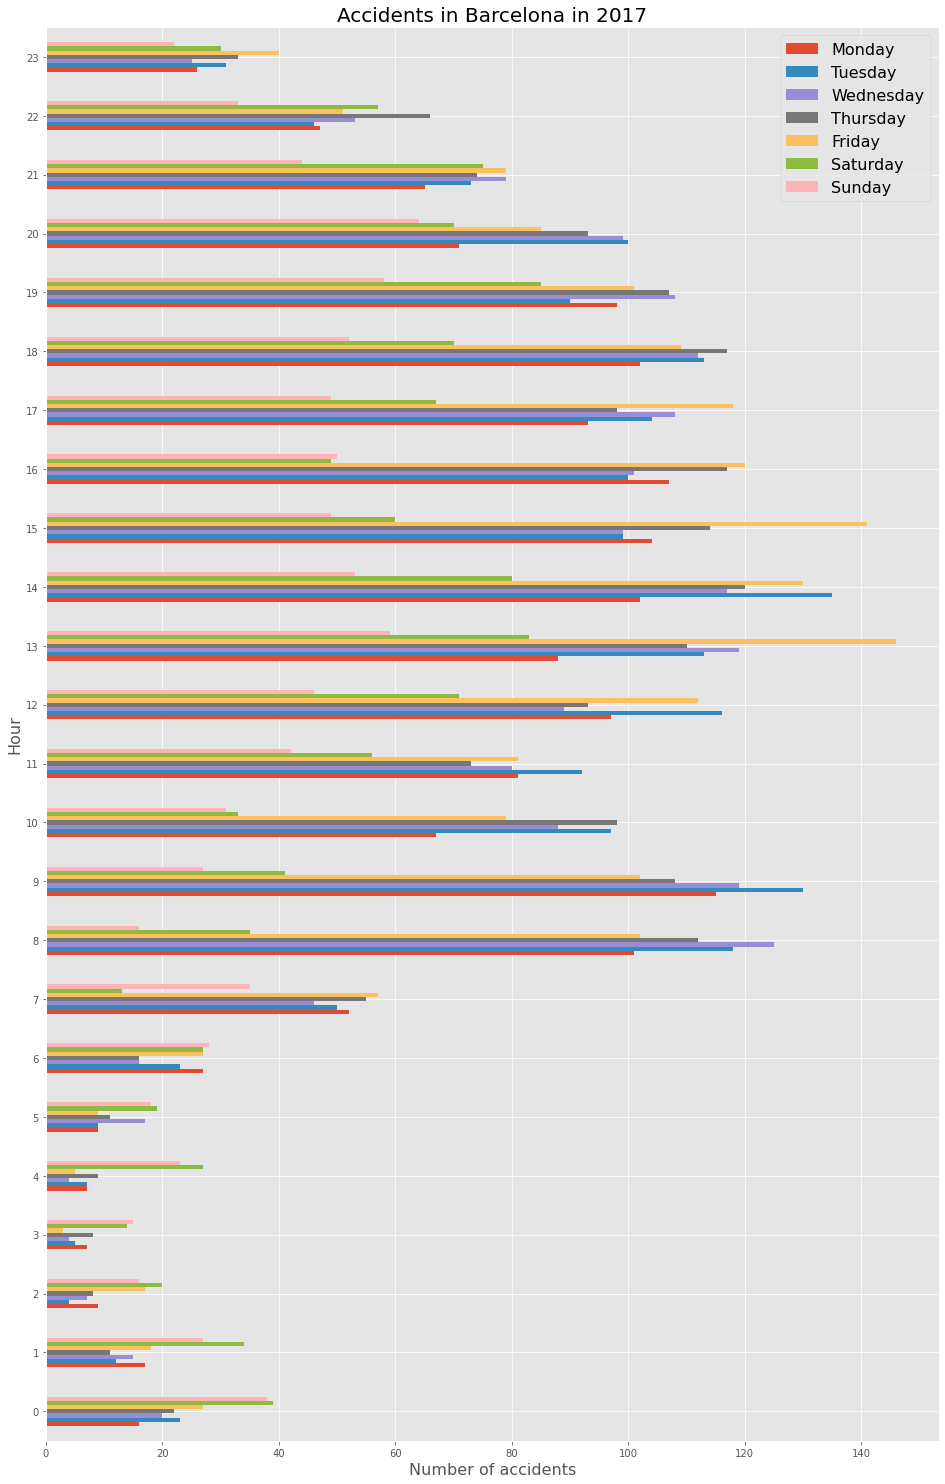

In [26]:
# Number of accident per hour and day
accidents_hour_day = df.groupby([df['date'].dt.hour.rename('hour'),df['date'].dt.dayofweek.rename('day')]).count().date

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

As we can easily observe, there are more accidents at night on weekends than during weekdays. On the contrary, there are much more accidents from early-morning (8) til afternoon (19) during weekdays than at the weekend.

## Location analysis

The best way to analyze spacial data is by using maps. Folium is a python library that helps you create several types of Leaflet maps. We can easily generate a map of Barcelona, creating a Folium Map object. The location argument allows to center the map in a specific location (in our case Barcelona). We can also provide an initial zoom level into that location to zoom the map into the center.

In [27]:
import folium

# Define a map centered around Barcelona
barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display the map
barcelona_map

Despite the initial zoom level, the map generated is interactive, meaning you can easily zoom in and out.

The dataset includes the latitude and longitude of each car accident. We can easily visualize them by using circle markers. The following map shows the accidents where serious injuries were caused, displaying the number of serious injuries with a popup label.

In [28]:
# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.features.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(barcelona_map)
    
# Show map
barcelona_map

In Folium, we can also group markers into different clusters using the MarkerCluster object. The following plot depicts car accidents with seriously injured victims as before, but this time the accidents are group into clusters.

In [29]:
from folium import plugins

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Instantiate a mark cluster object for the car accidents
accidents = plugins.MarkerCluster().add_to(barcelona_map)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
barcelona_map

One striking feature of Folium is the possibility of creating animated heat maps, changing the data being shown based on a certain dimension (e.g. hours). We can easily achieve that by using the HeatMapWithTime() class method. First, we create a nested list where each position contains the latitude and longitude of all car accidents in that specific hour. For instance, hour_list[0] contains the car accidents that happen from 00:00:00 to 00:59:00 (e.g. hour_list[0] → [[lat1,lon1],[lat2,lon2],[lat3,lon3],…,[latn,logn]). Then, we call the method and add it to our map.

In [30]:
from folium.plugins import HeatMapWithTime

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Nested list that contains the latitud and the longitud of the different accidents. 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(df.latitude,df.longitude,df.date.dt.hour):
    hour_list[hour].append([lat,log]) 

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(barcelona_map)

barcelona_map

Looking at the above timeline, we can observe how the number of accidents increases from 8 hours, remaining high until 21 hours when starts to decrease.